In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from skimage import io, color, img_as_bool, exposure, transform, feature
%matplotlib inline

### Download images (.zip, Google Drive, ~1GB) [here](https://drive.google.com/file/d/1MEx7txB-U7gpM6P58cOMmanW-SsbDw5v/view?usp=sharing)

Save the zip where you want to store the images and unzip it

In [2]:
# file paths
ci_path = './plane_data/cropped_images/'
l_file = './plane_data/plane_labels.csv'

(360, 640, 4)


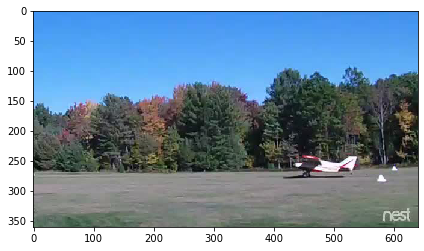

In [3]:
img_raw = io.imread('2016-10-10T19+44+49_610Z')
print(img_raw.shape)
io.imshow(img_raw)

## scikit image

#### helpful submodules and methods for image processing and feature extraction

* [io](http://scikit-image.org/docs/dev/api/skimage.io.html)  
* [color](http://scikit-image.org/docs/dev/api/skimage.color.html)  
* [exposure](http://scikit-image.org/docs/dev/api/skimage.exposure.html)   
* [transform](http://scikit-image.org/docs/dev/api/skimage.transform.html)   
* [feature](http://scikit-image.org/docs/dev/api/skimage.feature.html)  
* [img_as_bool](http://scikit-image.org/docs/dev/api/skimage.html#img-as-bool)   

#### other resources

* [RGBA](https://en.wikipedia.org/wiki/RGBA_color_space)  


In [4]:
# all labels
plane_data = pd.read_csv(l_file)
print(plane_data.head())
print(plane_data.shape)

                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
(6758, 2)


### let's look at some images that contain an airplane

In [5]:
# filter to include only the airplane images
print(plane_data['plane'].sum())
aircraft = plane_data[plane_data['plane']==True]
print(aircraft.shape)

101
(101, 2)


In [6]:
# take a random subset of 20 of the airplane images
aircraft_subset = aircraft.sample(20)
print(aircraft_subset.shape)

(20, 2)


In [7]:
# let's look at some transformed images of positives (airplanes)
for index, row in aircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
    img_raw = io.imread(imname)
    gray = color.rgb2gray(img_raw) # remove color
    final_image = img_as_bool(gray) # convert grayscale to boolean
    plt.figure()
    io.imshow(final_image)

/var/folders/qn/rnhppd716mvg1dm26kjg8jyc0000gn/T/ipykernel_65602/2178452726.py:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = color.rgb2gray(img_raw) # remove color


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

<Figure size 432x288 with 0 Axes>

In [8]:
# filter to include only the airplane images
print(plane_data['plane'].sum())
aircraft = plane_data[plane_data['plane']==True]
print(aircraft.shape)

101
(101, 2)


In [9]:
# take a random subset of 20 of the airplane images
aircraft_subset = aircraft.sample(20)
print(aircraft_subset.shape)

(20, 2)


In [10]:
# filter to include only the airplane images
print(plane_data['plane'].sum())
aircraft = plane_data[plane_data['plane']==True]
print(aircraft.shape)

101
(101, 2)


In [11]:
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
from skimage import data, exposure, img_as_float

/var/folders/qn/rnhppd716mvg1dm26kjg8jyc0000gn/T/ipykernel_65602/804058403.py:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = color.rgb2gray(img_raw) # remove color
/var/folders/qn/rnhppd716mvg1dm26kjg8jyc0000gn/T/ipykernel_65602/804058403.py:19: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray1 = color.rgb2gray(final_image1) # remove color


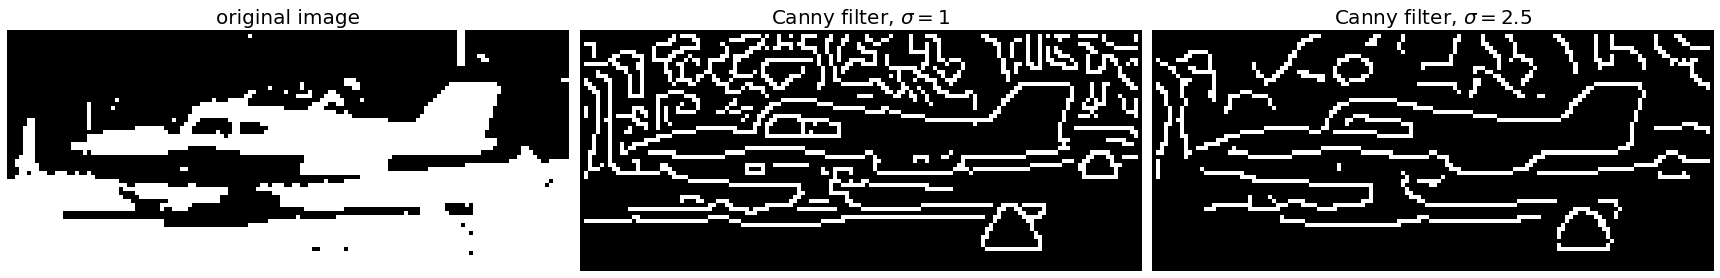

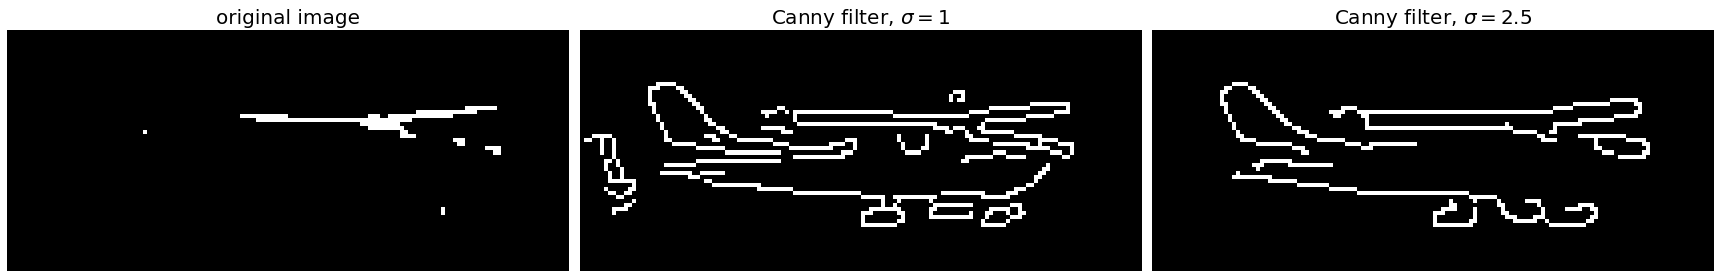

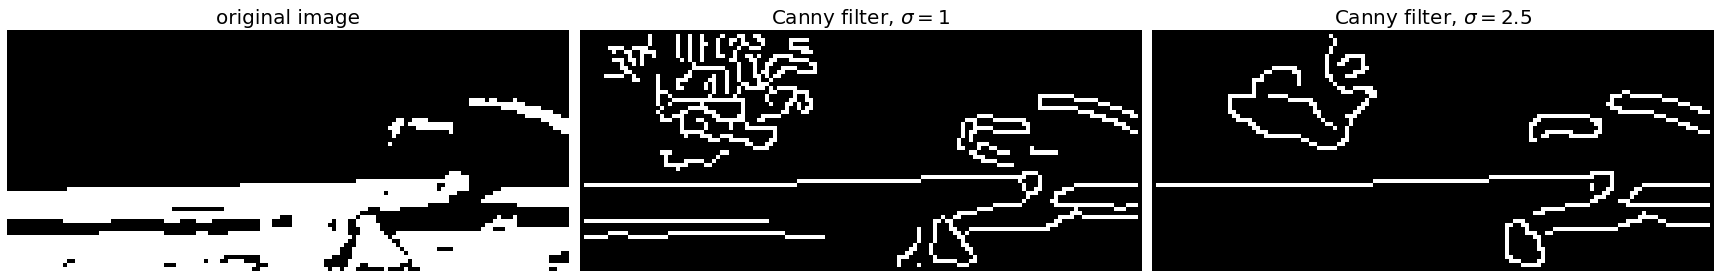

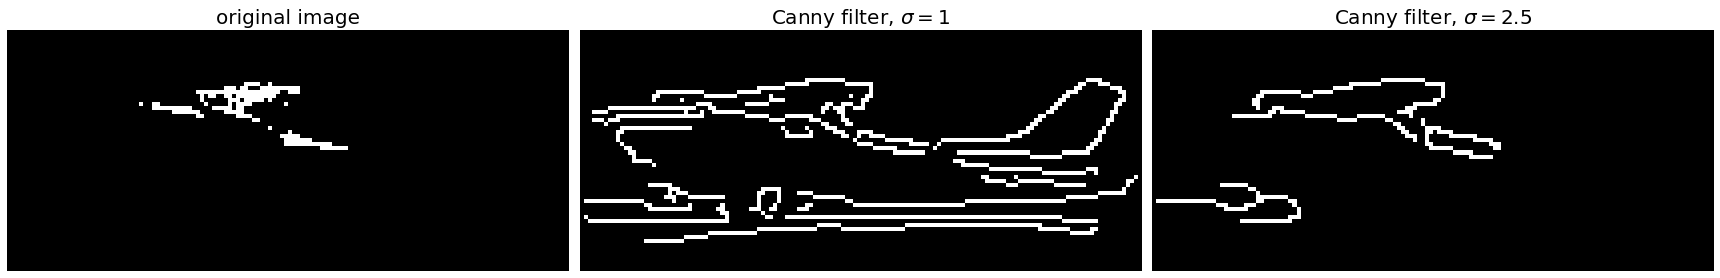

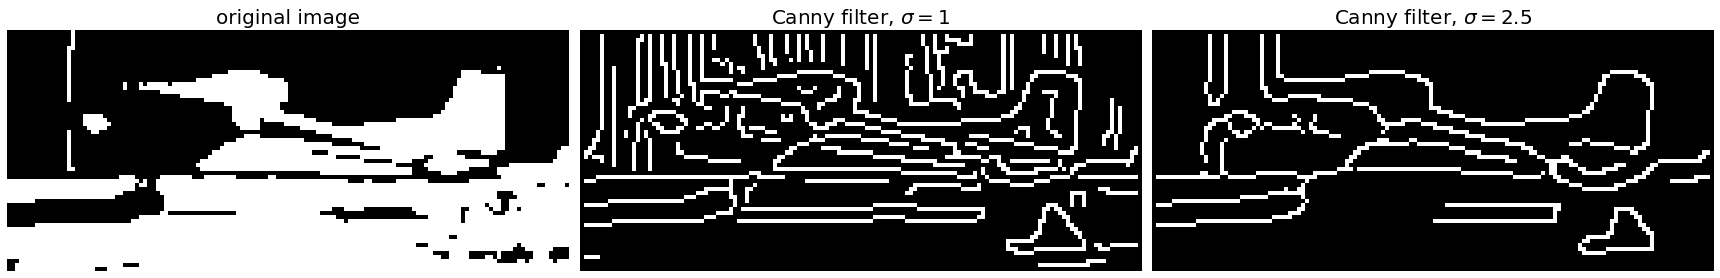

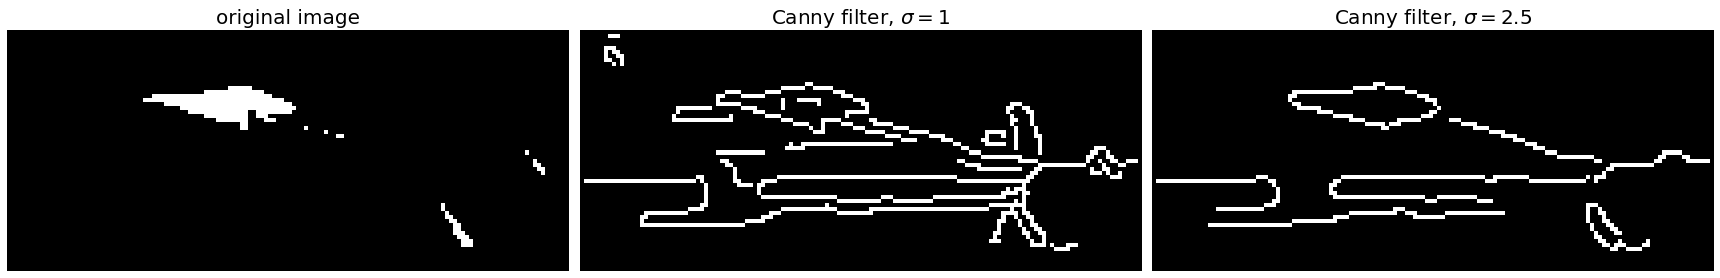

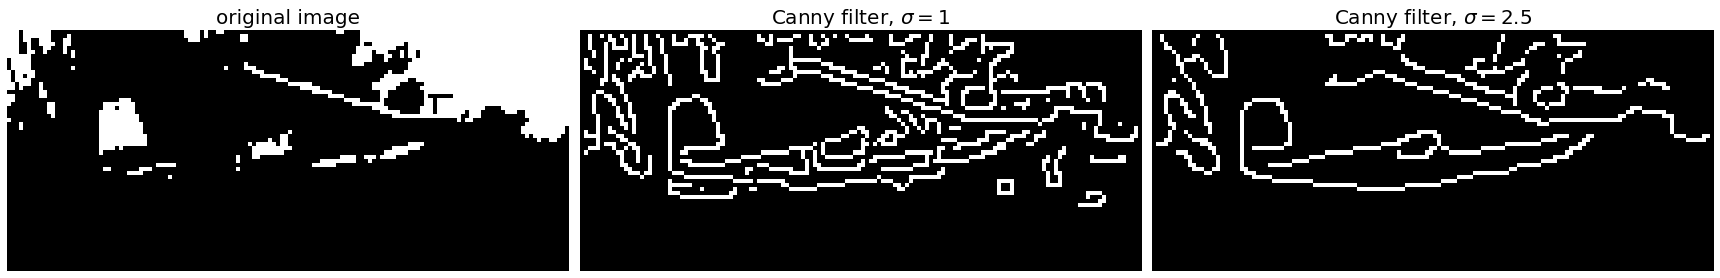

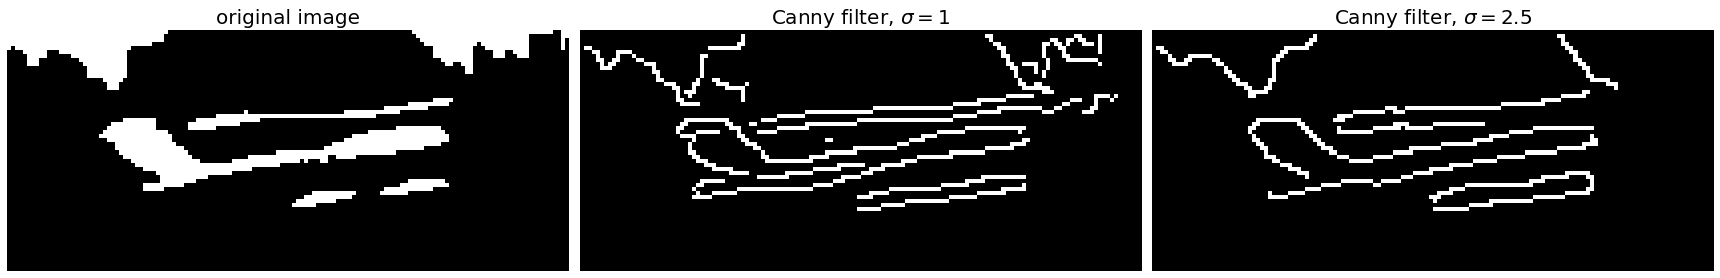

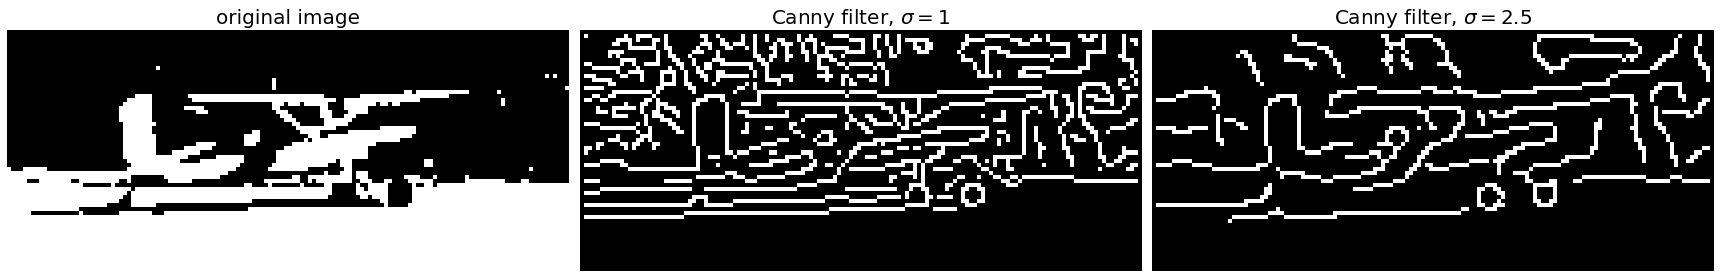

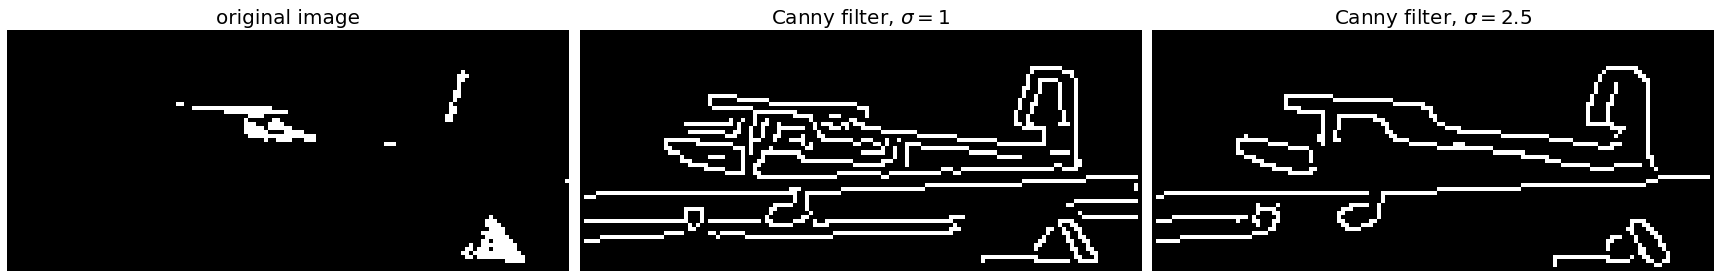

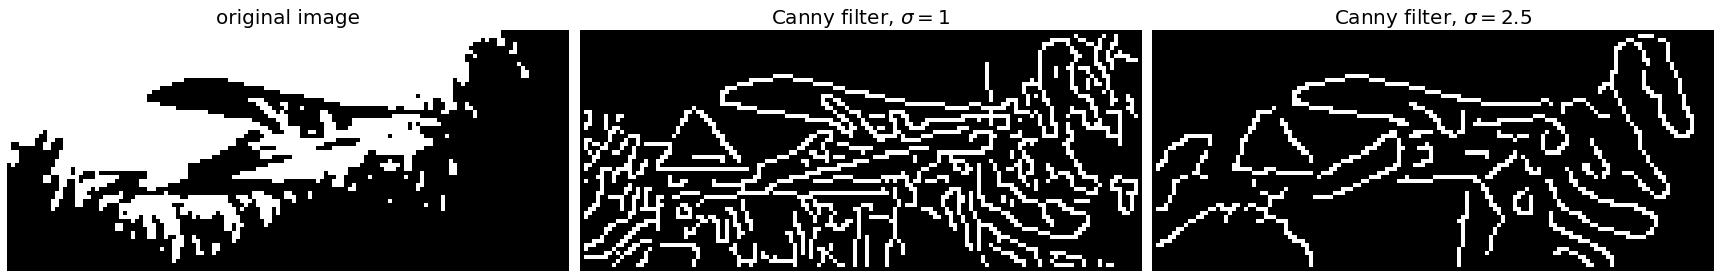

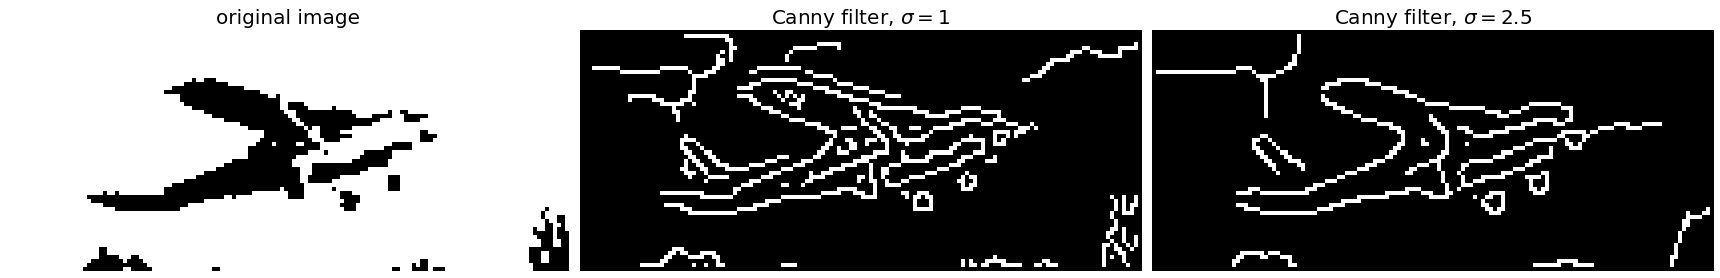

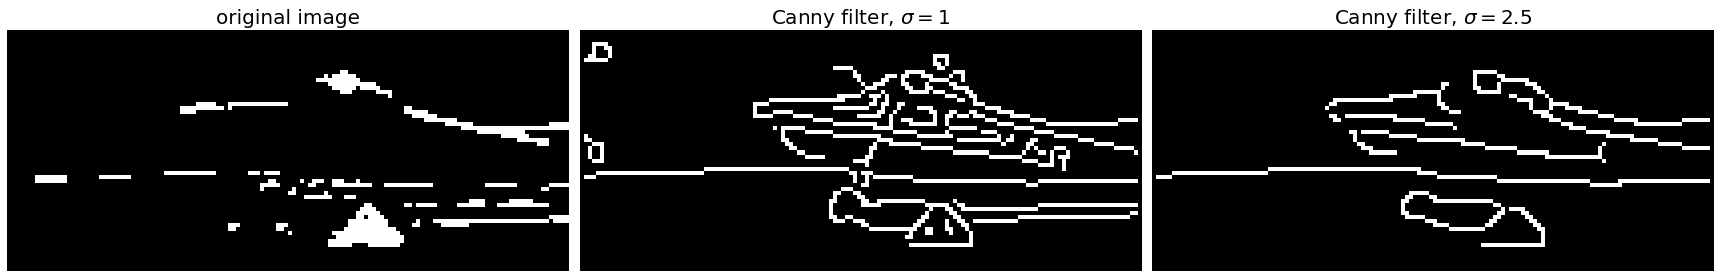

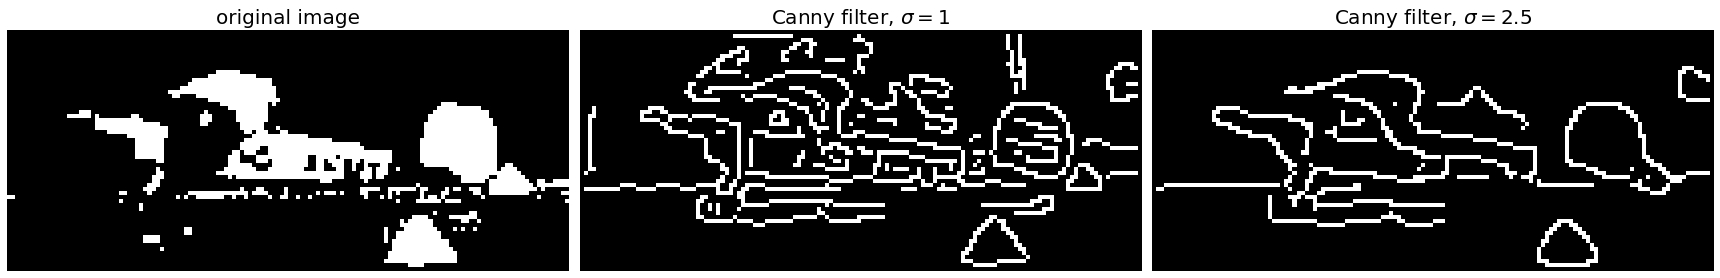

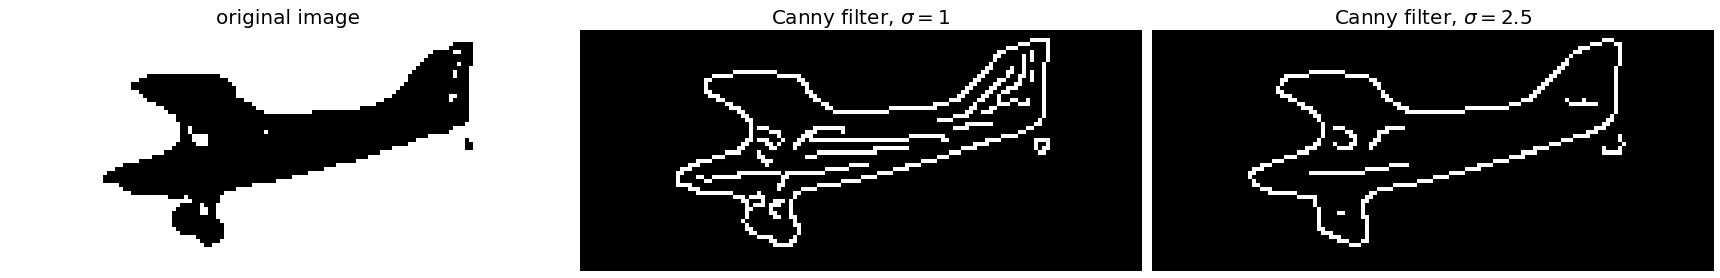

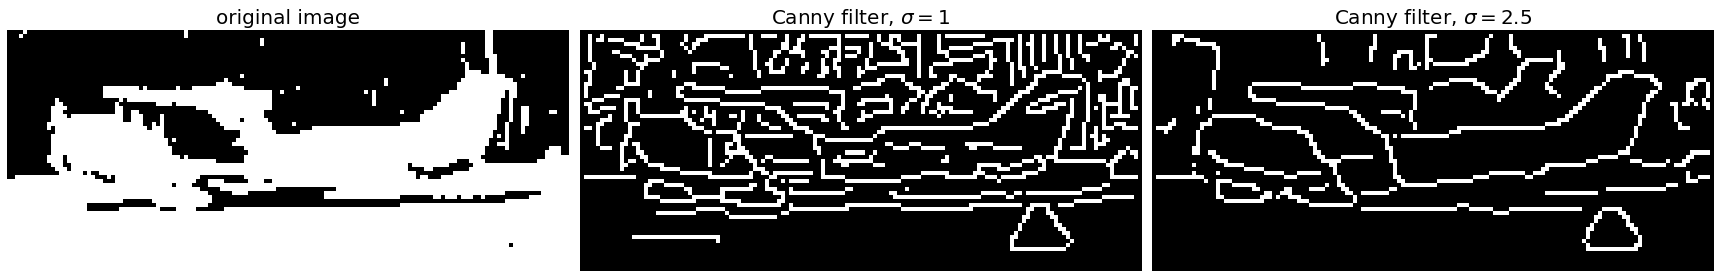

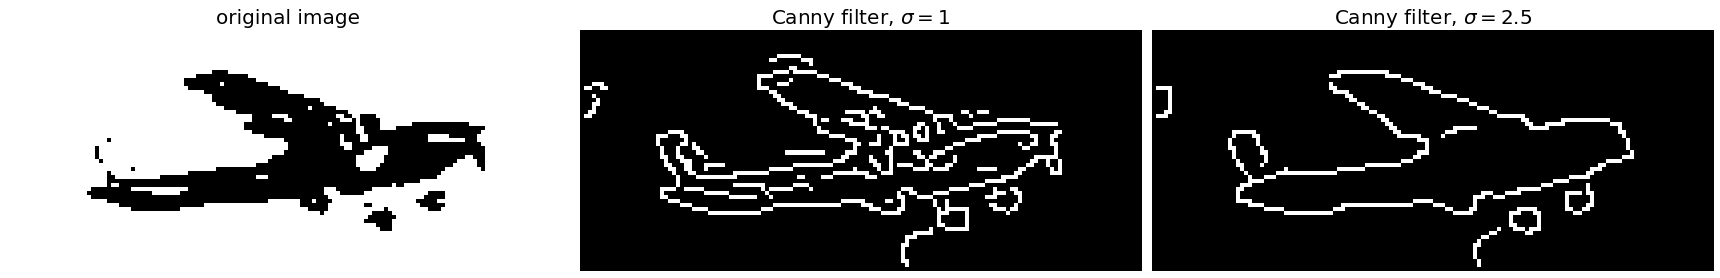

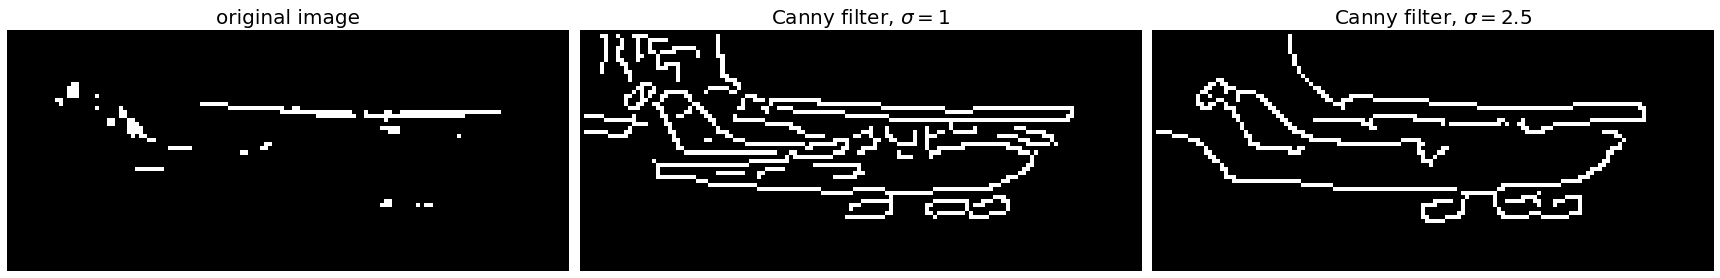

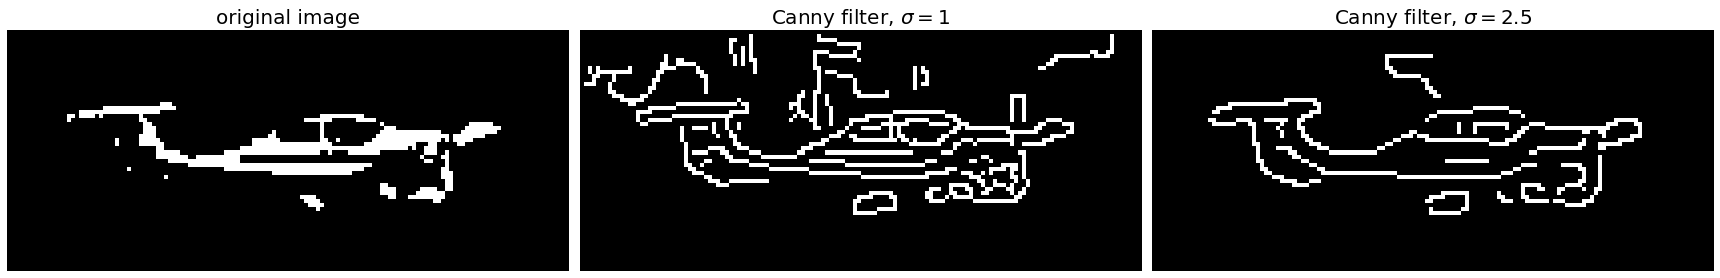

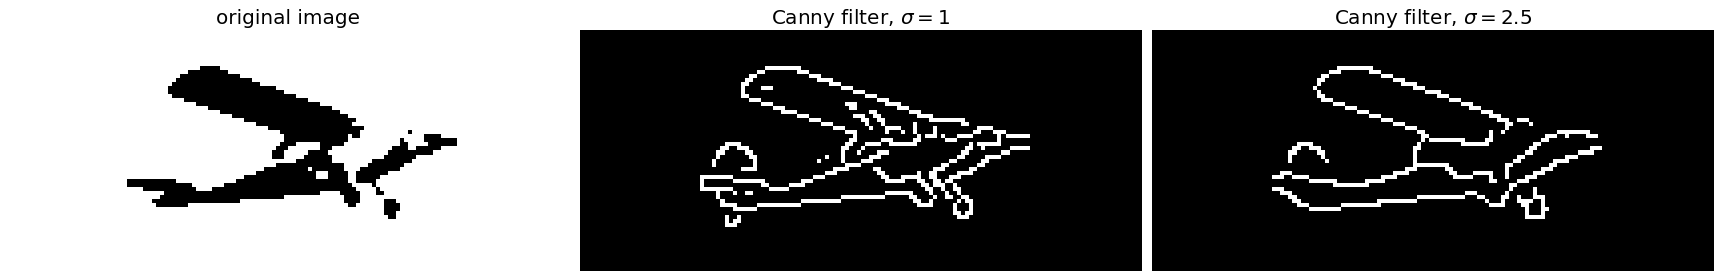

In [14]:
# let's look at some transformed images of positives (airplanes)
for index, row in aircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
    img_raw = io.imread(imname)
    
    iaf = img_as_float(img_raw)
    
    gray = color.rgb2gray(img_raw) # remove color
    final_image = img_as_bool(gray) # convert grayscale to boolean
    
    #fi = adjust_gamma(img_raw, gamma=2, gain=2)
    #gray = color.rgb2gray(fi) # remove color
    #final_image = img_as_bool(gray) # convert grayscale to boolean
    

    final_image = img_as_bool(gray) # convert grayscale to boolean

    final_image1 = exposure.adjust_gamma(iaf, 1.1)
    gray1 = color.rgb2gray(final_image1) # remove color
    final_image = img_as_bool(gray)
    
    edges1 = feature.canny(gray1,  sigma=1)
    edges2 = feature.canny(gray1, sigma=2, low_threshold = 0.05)

    # display results
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize= (24, 9))

    ax[0].imshow(final_image, cmap='gray')
    ax[0].set_title('original image', fontsize=20)

    ax[1].imshow(edges1, cmap='gray')
    ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

    ax[2].imshow(edges2, cmap='gray')
    ax[2].set_title(r'Canny filter, $\sigma=2.5$', fontsize=20)

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()
    
    #gray = color.rgb2gray(img_raw) # remove color
   # final_image = img_as_bool(gray) # convert grayscale to boolean
    #plt.figure()
    #io.imshow(final_image)

/var/folders/qn/rnhppd716mvg1dm26kjg8jyc0000gn/T/ipykernel_65602/787790206.py:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = color.rgb2gray(img_raw) # remove color
/var/folders/qn/rnhppd716mvg1dm26kjg8jyc0000gn/T/ipykernel_65602/787790206.py:12: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  io.imshow(color.rgb2gray(img_raw))


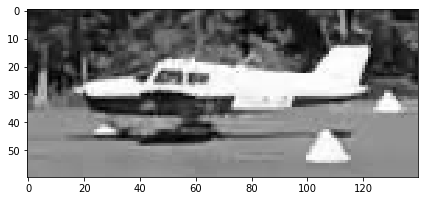

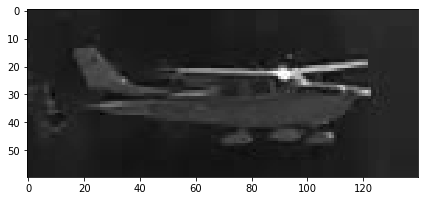

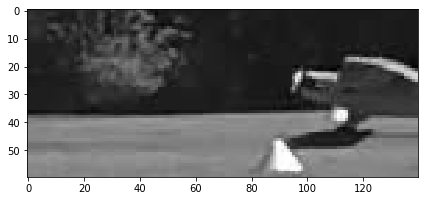

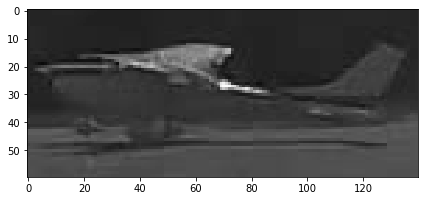

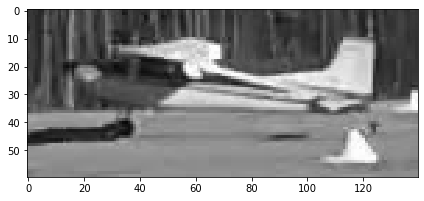

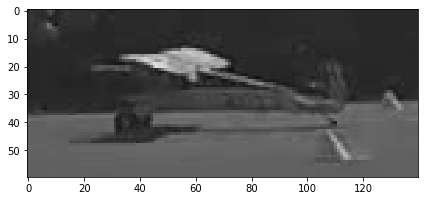

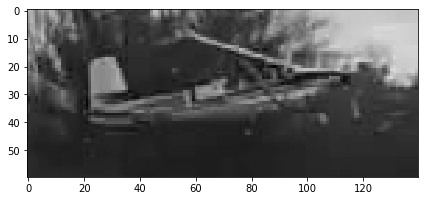

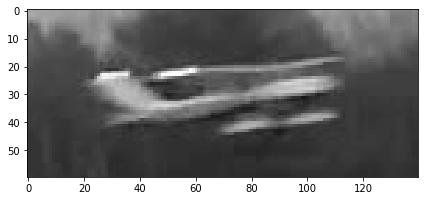

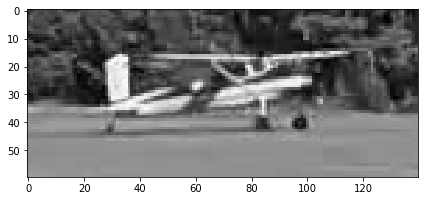

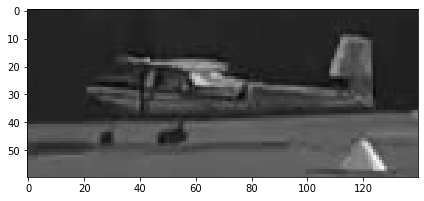

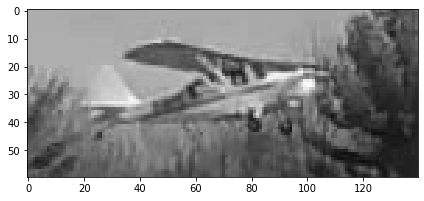

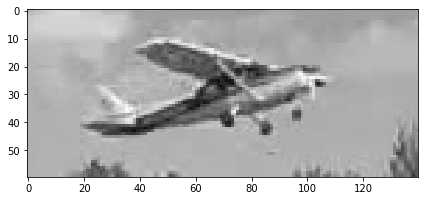

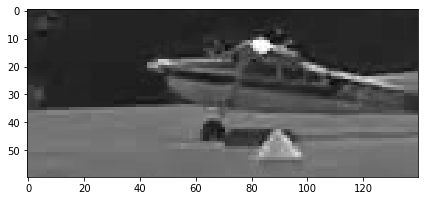

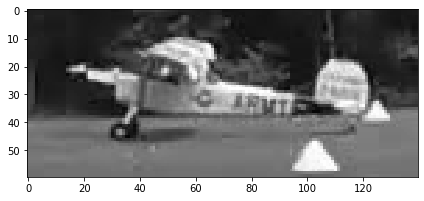

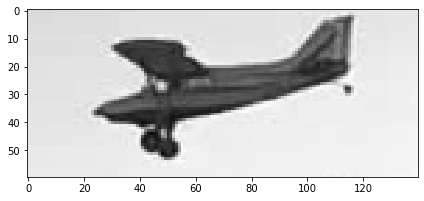

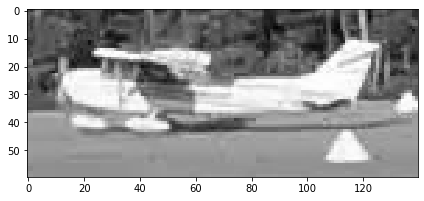

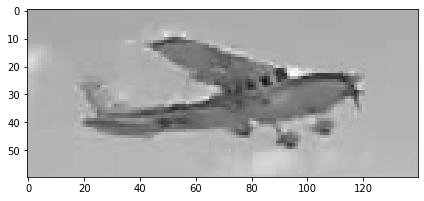

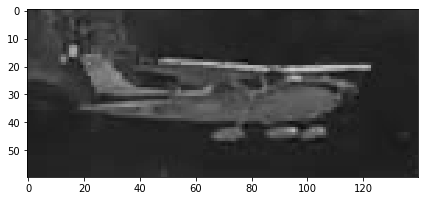

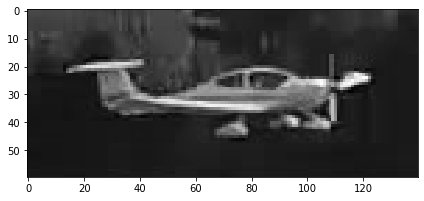

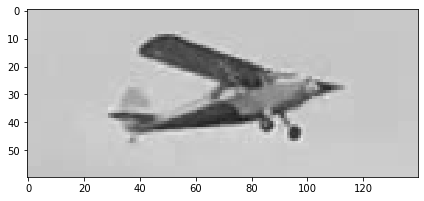

In [15]:
# let's look at some transformed images of positives (airplanes)
for index, row in aircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
    img_raw = io.imread(imname)
    
    
    
    
    gray = color.rgb2gray(img_raw) # remove color
    #final_image = img_as_bool(gray) # convert grayscale to boolean
    plt.figure()
    io.imshow(color.rgb2gray(img_raw))

### look at transformed images WITHOUT airplanes

In [16]:
# filter to include only NON airplane images
nonaircraft = plane_data[plane_data['plane']==False]
# take a random subset of 20 of the NON airplane images
nonaircraft_subset = nonaircraft.sample(20)
print(nonaircraft_subset.shape)

# let's look at some transformed images of positives (airplanes)
for index, row in nonaircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
    img_raw = io.imread(imname)
    gray = color.rgb2gray(img_raw) # remove color
    final_image = img_as_bool(gray) # convert grayscale to boolean
    plt.figure()
    io.imshow(final_image)

(20, 2)


/var/folders/qn/rnhppd716mvg1dm26kjg8jyc0000gn/T/ipykernel_65602/310581561.py:11: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = color.rgb2gray(img_raw) # remove color


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

<Figure size 432x288 with 0 Axes>